# Student Mental Health Analysis During Online Learning

This project uses Python libraries (Pandas, NumPy, Matplotlib, and Seaborn) to perform an Exploratory Data Analysis (EDA) on student mental health data, focusing on the impact of digital habits and lifestyle factors.

The goal is to demonstrate proficiency in:
1.  Pandas for data cleaning and transformation.
2.  NumPy (underlying logic) for efficient numerical operations.
3.  Seaborn/Matplotlib for comprehensive data visualization.
4.  Identifying key relationships and potential risk factors.

In [ ]:
# Import core data analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Student Mental Health Analysis During Online Learning.csv'
df = pd.read_csv(file_path)

print(f"Data successfully loaded from: {file_path}")

Data successfully loaded from: Student Mental Health Analysis During Online Learning.csv


1. Data Loading & Initial Inspection

The first step is to load the data and perform an initial inspection to understand its structure, data types, and check for missing values.

In [ ]:
file_path = 'Student Mental Health Analysis During Online Learning.csv'
df = pd.read_csv(file_path)

print("--- DataFrame Info (Initial Check) ---")
df.info()

print("\n--- DataFrame Head ---")
print(df.head())

--- DataFrame Info (Initial Check) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          1000 non-null   object 
 1   Gender                        1000 non-null   object 
 2   Age                           1000 non-null   int64  
 3   Education Level               1000 non-null   object 
 4   Screen Time (hrs/day)         1000 non-null   float64
 5   Sleep Duration (hrs)          1000 non-null   float64
 6   Physical Activity (hrs/week)  1000 non-null   float64
 7   Stress Level                  1000 non-null   object 
 8   Anxious Before Exams          1000 non-null   object 
 9   Academic Performance Change   1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.3+ KB

--- DataFrame Head ---
     Name  Gender  Age Education Level  Screen Time (hrs/day

In [ ]:
# Display the first 5 rows to see the data structure
print("--- DataFrame Head ---")
print(df.head())

# Display concise summary including data types and non-null counts
print("\n--- DataFrame Info ---")
df.info()

# Display descriptive statistics for all columns
print("\n--- Descriptive Statistics ---")
print(df.describe(include='all'))

--- DataFrame Head ---
     Name  Gender  Age Education Level  Screen Time (hrs/day)  \
0   Aarav    Male   15         Class 8                    7.1   
1   Meera  Female   25             MSc                    3.3   
2  Ishaan    Male   20           BTech                    9.5   
3  Aditya    Male   20              BA                   10.8   
4   Anika  Female   17        Class 11                    2.8   

   Sleep Duration (hrs)  Physical Activity (hrs/week) Stress Level  \
0                   8.9                           9.3       Medium   
1                   5.0                           0.2       Medium   
2                   5.4                           6.2       Medium   
3                   5.6                           5.5         High   
4                   5.4                           3.1       Medium   

  Anxious Before Exams Academic Performance Change  
0                   No                        Same  
1                   No                        Same  
2     

2. Data Cleaning & Preprocessing

I performed three key cleaning steps:
1.  Drop the non-analytical `Name` column.
2.  Standardize column names to `snake_case` for easier programming.
3.  Map the binary categorical feature (`Anxious Before Exams`) to a numerical (1/0) format for correlation analysis (Label Encoding).

In [ ]:
# Drop the irrelevant 'Name' column
df_cleaned = df.drop(columns='Name')

# Standardize column names to snake_case
column_name_mapping = {
    'Gender': 'gender',
    'Age': 'age',
    'Education Level': 'education_level',
    'Screen Time (hrs/day)': 'screen_time',
    'Sleep Duration (hrs)': 'sleep_duration',
    'Physical Activity (hrs/week)': 'physical_activity',
    'Stress Level': 'stress_level',
    'Anxious Before Exams': 'anxious_before_exams',
    'Academic Performance Change': 'academic_performance_change'
}
df_cleaned.rename(columns=column_name_mapping, inplace=True)

# Map binary categorical data to numerical (1/0) for correlation analysis later
df_cleaned['anxious_before_exams_numeric'] = df_cleaned['anxious_before_exams'].map({'Yes': 1, 'No': 0})

print("--- Cleaned DataFrame Head (After Transformation) ---")
print(df_cleaned.head())

--- Cleaned DataFrame Head (After Transformation) ---
   gender  age education_level  screen_time  sleep_duration  \
0    Male   15         Class 8          7.1             8.9   
1  Female   25             MSc          3.3             5.0   
2    Male   20           BTech          9.5             5.4   
3    Male   20              BA         10.8             5.6   
4  Female   17        Class 11          2.8             5.4   

   physical_activity stress_level anxious_before_exams  \
0                9.3       Medium                   No   
1                0.2       Medium                   No   
2                6.2       Medium                   No   
3                5.5         High                  Yes   
4                3.1       Medium                  Yes   

  academic_performance_change  anxious_before_exams_numeric  
0                        Same                             0  
1                        Same                             0  
2                        Same   

3. Exploratory Data Analysis (EDA)

I started by examining stress levels.

A box plot to compare the distribution of physical activity across different stress levels.


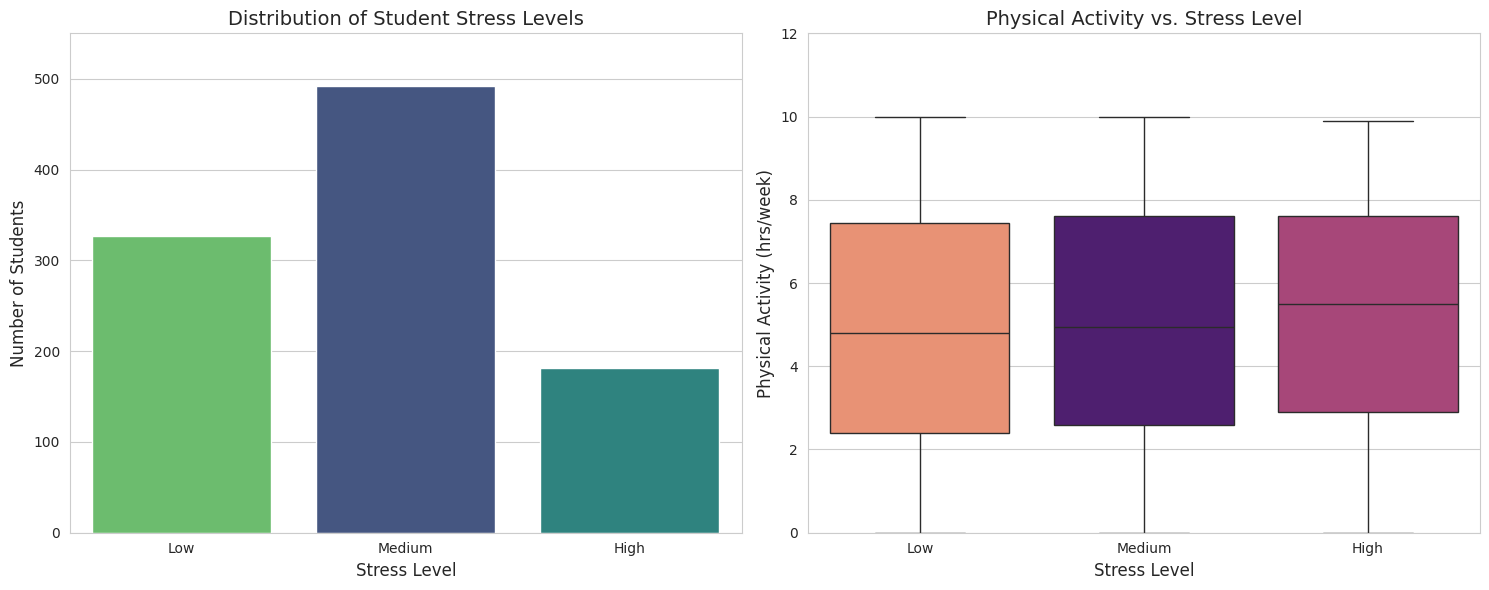

In [ ]:
plt.figure(figsize=(15, 6))

# Distribution of Stress Level (Univariate Count Plot)
plt.subplot(1, 2, 1)
sns.countplot(
    data=df_cleaned,
    x='stress_level',
    order=['Low', 'Medium', 'High'],
    palette='viridis',
    hue='stress_level'
)
plt.title('Distribution of Student Stress Levels', fontsize=14)
plt.xlabel('Stress Level', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.ylim(0, 550)

# Physical Activity vs. Stress Level (Box Plot)
plt.subplot(1, 2, 2)
sns.boxplot(
    data=df_cleaned,
    x='stress_level',
    y='physical_activity',
    order=['Low', 'Medium', 'High'],
    palette='magma',
    hue='stress_level'
)
plt.title('Physical Activity vs. Stress Level', fontsize=14)
plt.xlabel('Stress Level', fontsize=12)
plt.ylabel('Physical Activity (hrs/week)', fontsize=12)
plt.ylim(0, 12)

plt.tight_layout()

Next, I explored the impact of digital habits.

Visualized a multivariate scatter plot, showing the relationship between screen time and sleep, with stress level as a hue.


/tmp/ipython-input-2209490582.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


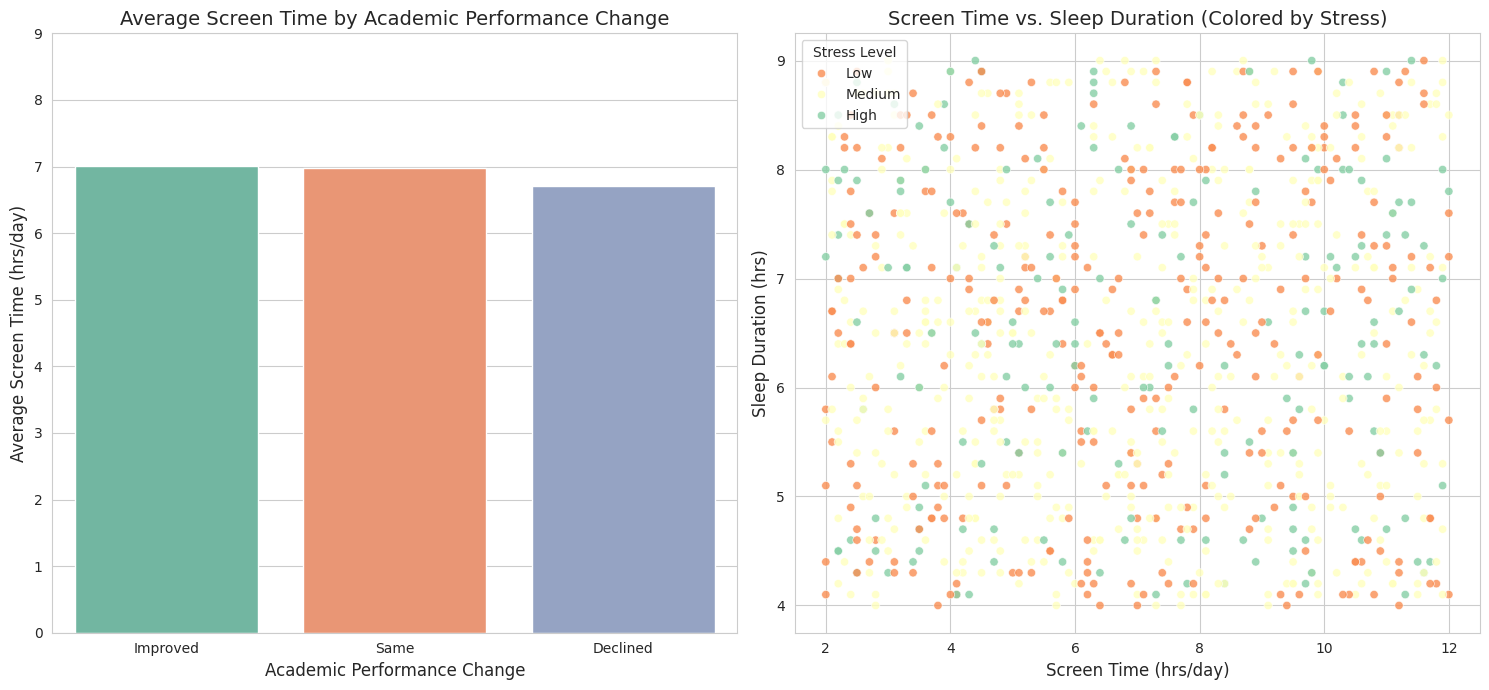

In [ ]:
plt.figure(figsize=(15, 7))

# Screen Time vs. Academic Performance Change (Bar Plot)
plt.subplot(1, 2, 1)
sns.barplot(
    data=df_cleaned,
    x='academic_performance_change',
    y='screen_time',
    order=['Improved', 'Same', 'Declined'],
    errorbar=None,
    palette='Set2'
)
plt.title('Average Screen Time by Academic Performance Change', fontsize=14)
plt.xlabel('Academic Performance Change', fontsize=12)
plt.ylabel('Average Screen Time (hrs/day)', fontsize=12)
plt.ylim(0, 9)

# Screen Time vs. Sleep Duration (Multivariate Scatter Plot)
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=df_cleaned,
    x='screen_time',
    y='sleep_duration',
    hue='stress_level',
    hue_order=['Low', 'Medium', 'High'],
    palette='Spectral',
    alpha=0.8
)
plt.title('Screen Time vs. Sleep Duration (Colored by Stress)', fontsize=14)
plt.xlabel('Screen Time (hrs/day)', fontsize=12)
plt.ylabel('Sleep Duration (hrs)', fontsize=12)
plt.legend(title='Stress Level')

plt.tight_layout()

4. Correlation Analysis

Finally, I calculated the linear correlation matrix for all numerical variables, including the mapped `anxious_before_exams_numeric` column. This demonstrates the numerical relationship between variables using Pandas and visualizes it using a Seaborn heatmap.


--- Correlation Matrix (Raw Pandas Output) ---
                                   age  screen_time  sleep_duration  \
age                           1.000000     0.008982       -0.010609   
screen_time                   0.008982     1.000000        0.011314   
sleep_duration               -0.010609     0.011314        1.000000   
physical_activity            -0.033600     0.028464       -0.013407   
anxious_before_exams_numeric -0.008936     0.025945        0.033224   

                              physical_activity  anxious_before_exams_numeric  
age                                   -0.033600                     -0.008936  
screen_time                            0.028464                      0.025945  
sleep_duration                        -0.013407                      0.033224  
physical_activity                      1.000000                     -0.012179  
anxious_before_exams_numeric          -0.012179                      1.000000  


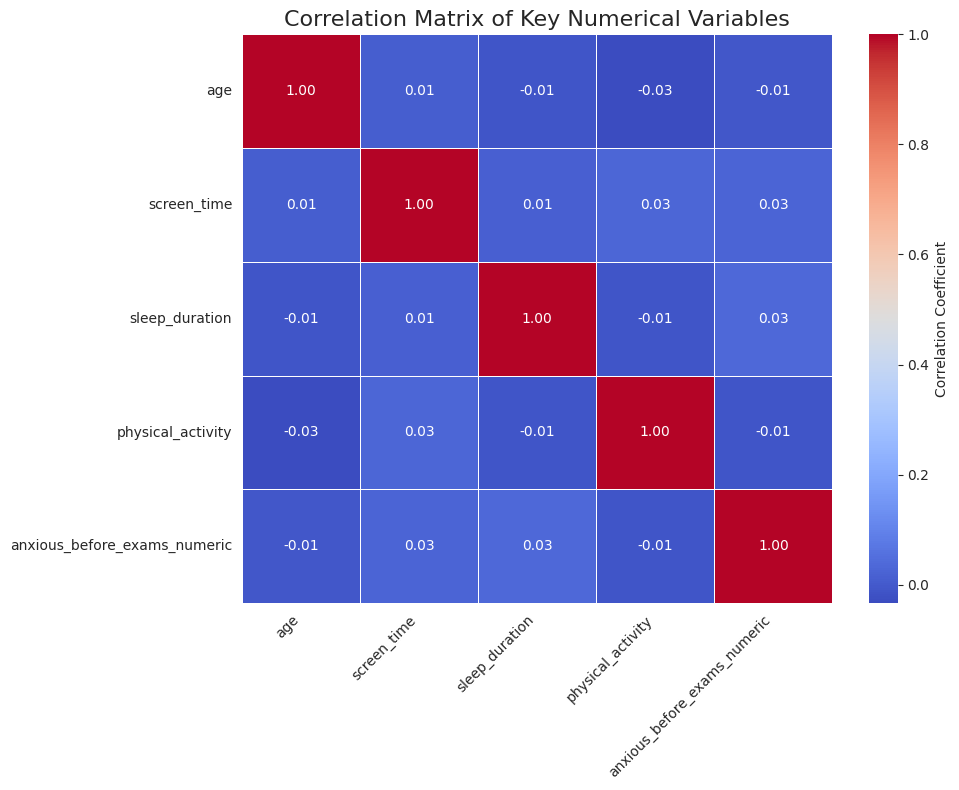

In [ ]:
# Select only the numerical columns for correlation
numerical_df = df_cleaned[[
    'age',
    'screen_time',
    'sleep_duration',
    'physical_activity',
    'anxious_before_exams_numeric'
]]

# Calculate the correlation matrix (Pandas)
correlation_matrix = numerical_df.corr()

# Visualize the Correlation Matrix (Seaborn & Matplotlib)
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)

plt.title('Correlation Matrix of Key Numerical Variables', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

print("\n--- Correlation Matrix (Raw Pandas Output) ---")
print(correlation_matrix)

This EDA successfully identified several key findings regarding student mental health during online learning:

1.  **Physical Activity is Protective:** Students with Low Stress consistently reported the highest physical activity levels, indicating a strong potential inverse relationship between exercise and stress.
2.  **Screen Time Impact:** Students whose academic performance Declined had the highest average screen time, suggesting a detrimental effect of excessive digital exposure on academic outcomes.
3.  **Weak Linear Correlation:** A simple linear correlation between raw numerical features (Age, Screen Time, Sleep, Activity) was generally weak, emphasizing the need for more complex modeling or focusing on categorical relationships (as done in the box plots).

This project demonstrates strong foundational skills in data science using NumPy, Pandas, Matplotlib, and Seaborn.